'''

Author: Prathamesh Deshpande<br>
Date: 12-11-24<br>
Last modified by: Prathamesh Deshpande<br>
Last modified time:<br>
Title: Simple Linear Regression to predict the values of y from the given value of x<br>

'''

Import libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score

Import the dataset

In [2]:
df_train = pd.read_csv("train.csv")
df_train

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [3]:
df_test = pd.read_csv("test.csv")
df_test

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


Analyze the dataset

In [4]:
print(df_train.shape)
print(df_test.shape)

(700, 2)
(300, 2)


In [5]:
df_train.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [6]:
df_test.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


Identifying the missing values

In [9]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

x    0
y    1
dtype: int64
x    0
y    0
dtype: int64


Drop Null Values

In [10]:
df_train.dropna(inplace=True)
df_train

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [11]:
df_train.isnull().sum()

x    0
y    0
dtype: int64

Data visualization

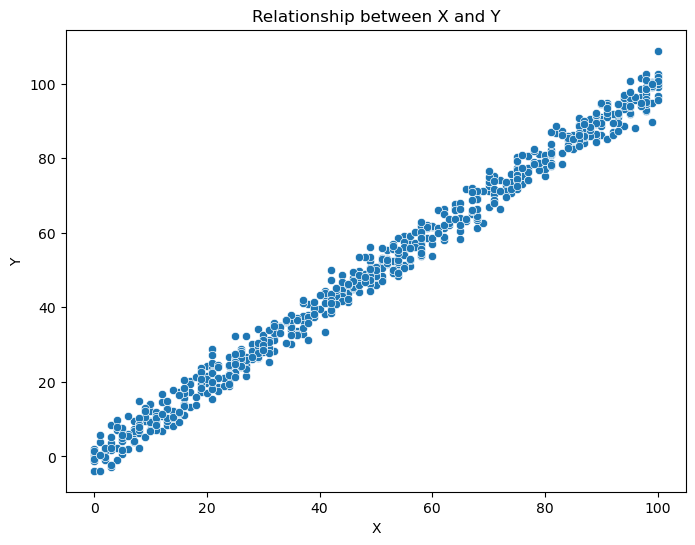

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=df_train)
plt.title("Relationship between X and Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Identify and handling Outliers

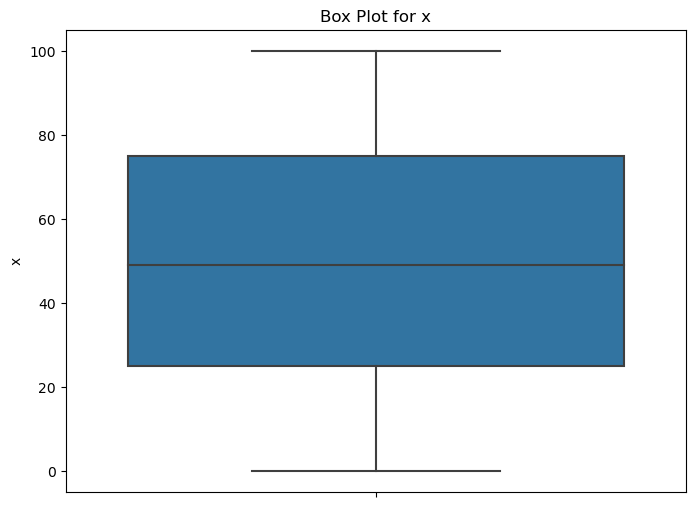

In [57]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='x', data=df_train)
plt.title("Box Plot for x")
plt.show()

train_test_split

In [80]:
x_train,y_train = df_train[['x']],df_train[['y']]
x_test,y_test = df_test[['x']],df_test[['y']]

In [81]:
x_train

,x
0,24.0
1,50.0
2,15.0
3,38.0
4,87.0
...,...
695,58.0
696,93.0
697,82.0
698,66.0


In [67]:
x_test

,x
0,77
1,21
2,22
3,20
4,36
...,...
295,71
296,46
297,55
298,62


In [59]:
y_train

,y
0,21.549452
1,47.464463
2,17.218656
3,36.586398
4,87.288984
...,...
695,58.595006
696,94.625094
697,88.603770
698,63.648685


In [68]:
y_test

,y
0,79.775152
1,23.177279
2,25.609262
3,17.857388
4,41.849864
...,...
295,68.545888
296,47.334876
297,54.090637
298,63.297171


Feature Scaling

In [82]:
sc = StandardScaler()

In [83]:
sc.fit(x_train)

StandardScaler()

In [74]:
x_train_scaled = sc.transform(x_train)

In [84]:
x_test_scaled = sc.transform(x_test)

Model selection and Training

In [85]:
lr = LinearRegression()

In [87]:
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [88]:
y_predict = lr.predict(x_test_scaled)

In [90]:
y_predict

array([[76.94327594],
       [20.90651855],
       [21.90717494],
       [19.90586217],
       [35.91636428],
       [14.90258026],
       [61.93343021],
       [94.95509081],
       [19.90586217],
       [ 4.89601644],
       [ 3.89536006],
       [18.90520579],
       [95.95574719],
       [61.93343021],
       [35.91636428],
       [14.90258026],
       [64.93539936],
       [13.90192388],
       [86.94983976],
       [68.93802488],
       [88.95115252],
       [50.92621001],
       [88.95115252],
       [26.91045685],
       [96.95640358],
       [57.93080468],
       [78.9445887 ],
       [20.90651855],
       [92.95377805],
       [26.91045685],
       [98.95771634],
       [30.91308237],
       [32.91439514],
       [79.94524508],
       [27.91111323],
       [46.92358448],
       [52.92752277],
       [68.93802488],
       [27.91111323],
       [32.91439514],
       [90.95246528],
       [70.93933765],
       [49.92555363],
       [75.94261956],
       [ 3.89536006],
       [36

Model Evaluation

In [54]:
mse = mean_squared_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)

In [55]:
print(mse)
print(r2)

9.432922192039317
0.9888014444327563


Visualize the result

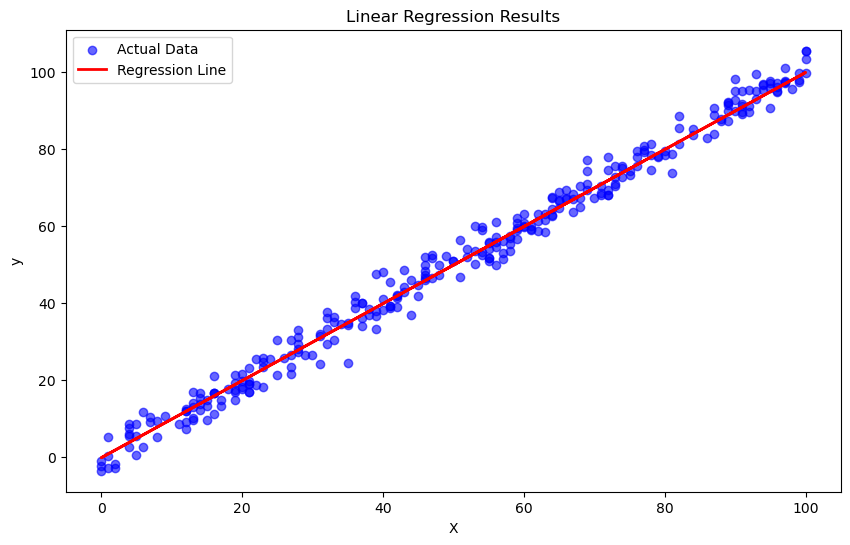

In [92]:
plt.figure(figsize=(10, 6))

# Scatter plot of actual data points
plt.scatter(x_test, y_test, color='blue', label='Actual Data', alpha=0.6)

# Plot regression line (predictions)
plt.plot(x_test, y_predict, color='red', linewidth=2, label='Regression Line')

# Labels and Title
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Results")
plt.legend()
plt.show()